In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [88]:
dataFrame = pd.read_csv("adult.csv")
dataFrame.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [89]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47985 non-null  int64 
 1   workclass        47985 non-null  object
 2   fnlwgt           47985 non-null  int64 
 3   education        47985 non-null  object
 4   educational-num  47985 non-null  int64 
 5   marital-status   47985 non-null  object
 6   occupation       47985 non-null  object
 7   relationship     47985 non-null  object
 8   race             47985 non-null  object
 9   gender           47985 non-null  object
 10  capital-gain     47985 non-null  int64 
 11  capital-loss     47985 non-null  int64 
 12  hours-per-week   47985 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           47985 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [90]:
dataFrame.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,4.798500e+04,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,1.895940e+05,10.067229,1067.032093,87.370553,40.411483
std,13.729622,1.057605e+05,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Quantitative

## Age

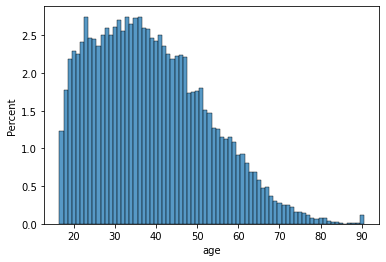

In [91]:
sns.histplot(x="age", data=dataFrame, discrete=True, stat="percent")
plt.show()

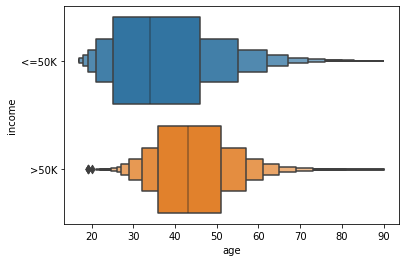

In [92]:
sns.boxenplot(y="income",x="age",data=dataFrame)
plt.show()

## Education

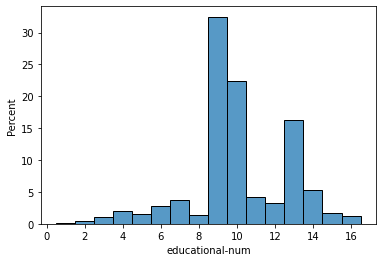

In [93]:
sns.histplot(x="educational-num", data=dataFrame, discrete=True, stat="percent")
plt.show()

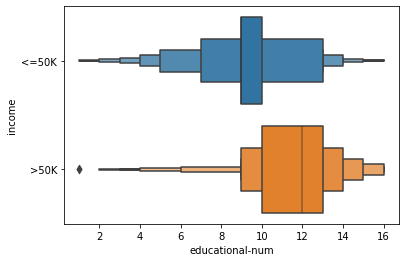

In [94]:
sns.boxenplot(x="educational-num", y="income", data=dataFrame)
plt.show()

## Capital-gain

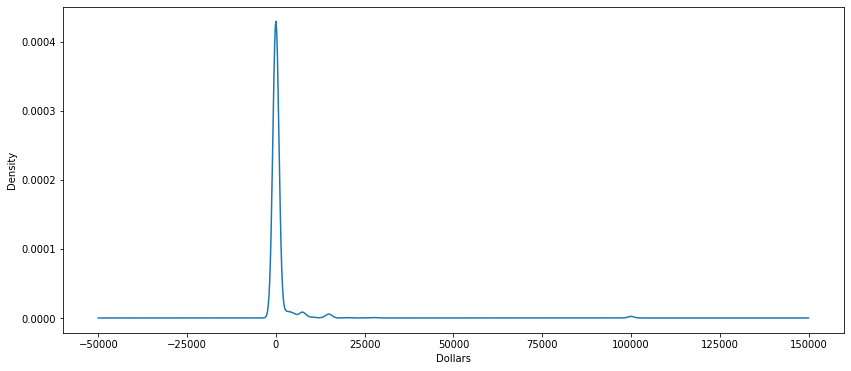

In [95]:
ax = dataFrame["capital-gain"].plot(kind="density",figsize=(14,6))
ax.set_ylabel("Density")
ax.set_xlabel("Dollars")
plt.show()


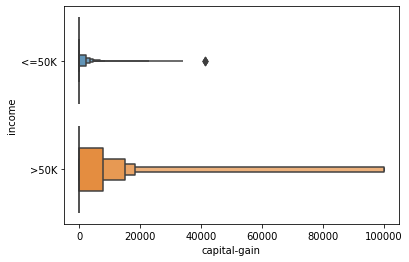

In [96]:
sns.boxenplot(y="income",x="capital-gain",data=dataFrame)
plt.show()

## Capital Loss

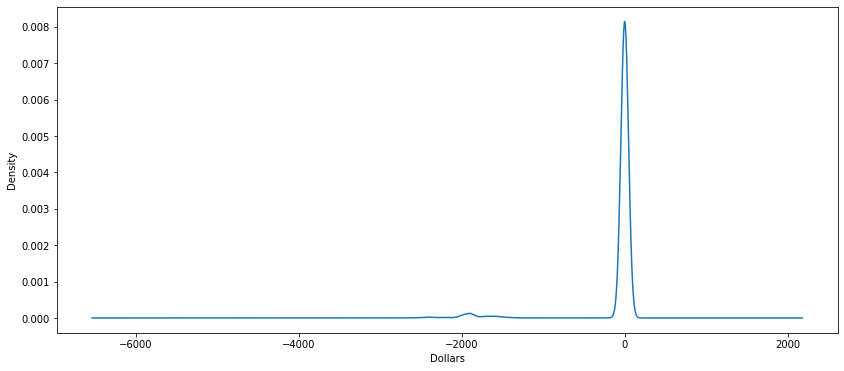

In [97]:
dataFrame["capital-loss"] = 0 - abs(dataFrame["capital-loss"])
ax = dataFrame["capital-loss"].plot(kind="density",figsize=(14,6))
ax.set_ylabel("Density")
ax.set_xlabel("Dollars")
plt.show()

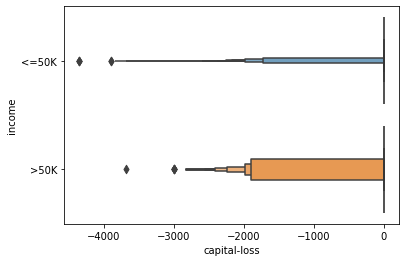

In [98]:
sns.boxenplot(y="income",x="capital-loss",data=dataFrame)
plt.show()

#

## Hours per Week

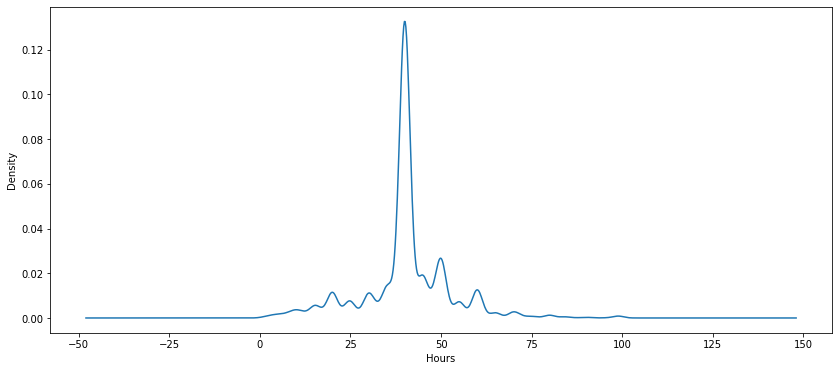

In [99]:
ax = dataFrame["hours-per-week"].plot(kind="density",figsize=(14,6))
ax.set_ylabel("Density")
ax.set_xlabel("Hours")
plt.show()

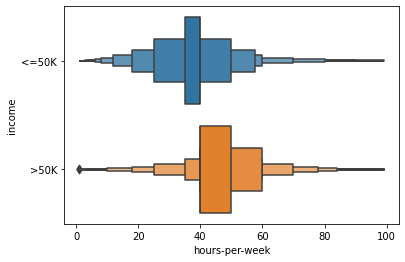

In [100]:
sns.boxenplot(y="income",x="hours-per-week",data=dataFrame)
plt.show()

# Qualitative

## Workclass

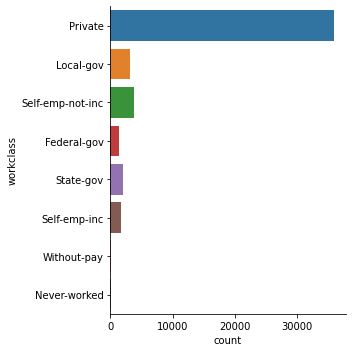

In [101]:
sns.catplot(y="workclass", kind="count", data=dataFrame, orient="h")
plt.show()

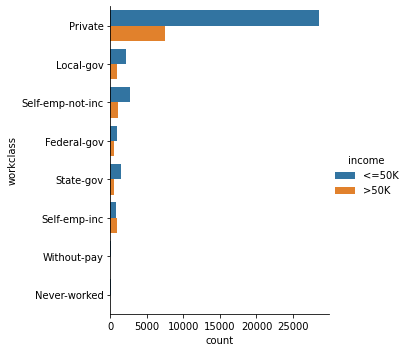

In [102]:
sns.catplot(y="workclass", hue="income", kind="count", data=dataFrame, orient="h")
plt.show()

## Marital Status

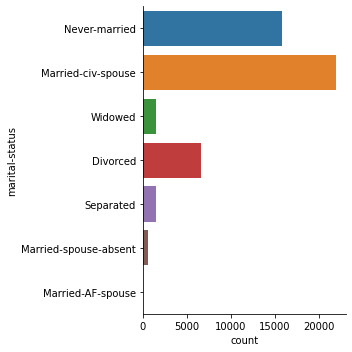

In [103]:
sns.catplot(y="marital-status", kind="count", data=dataFrame, orient="h")
plt.show()

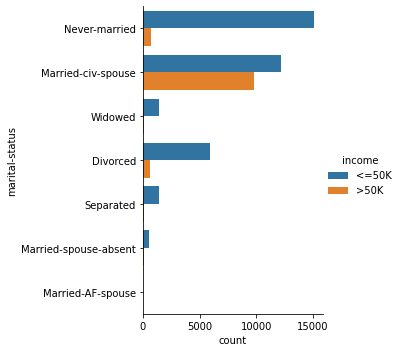

In [104]:
sns.catplot(y="marital-status", hue="income", kind="count", data=dataFrame, orient="h")
plt.show()

## Occupation

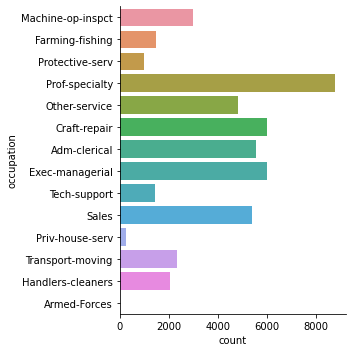

In [105]:
sns.catplot(y="occupation", kind="count", data=dataFrame, orient="h")
plt.show()

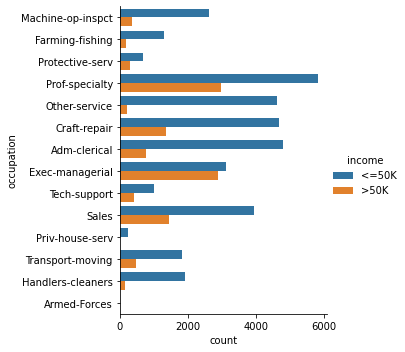

In [106]:
sns.catplot(y="occupation", hue="income", kind="count", data=dataFrame, orient="h")
plt.show()

## Relationship

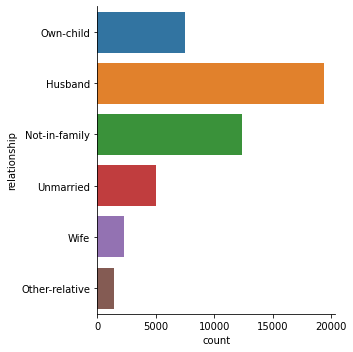

In [107]:
sns.catplot(y="relationship", kind="count", data=dataFrame, orient="h")
plt.show()

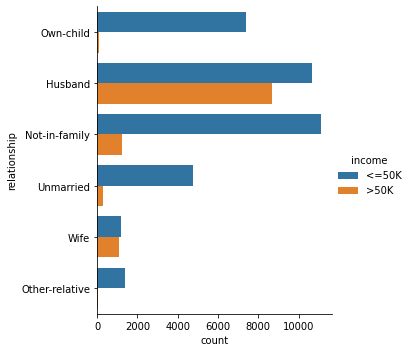

In [108]:
sns.catplot(y="relationship", hue="income", kind="count", data=dataFrame, orient="h")
plt.show()

## Race

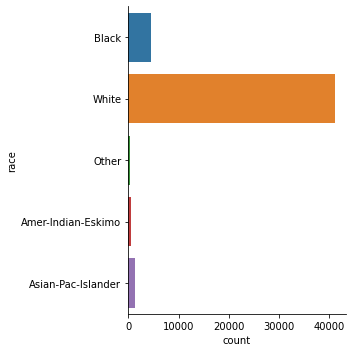

In [109]:
sns.catplot(y="race", kind="count", data=dataFrame, orient="h")
plt.show()

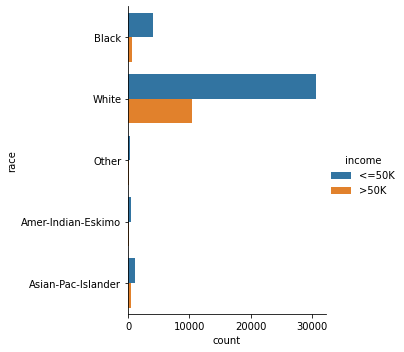

In [110]:
sns.catplot(y="race", hue="income", kind="count", data=dataFrame, orient="h")
plt.show()

## Gender

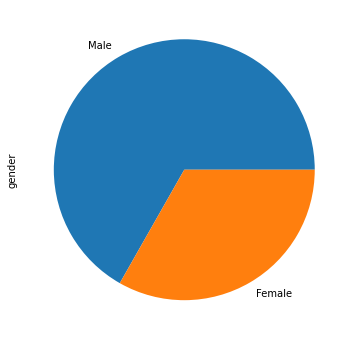

In [111]:
dataFrame["gender"].value_counts().plot(kind="pie", figsize=(14,6))
plt.show()

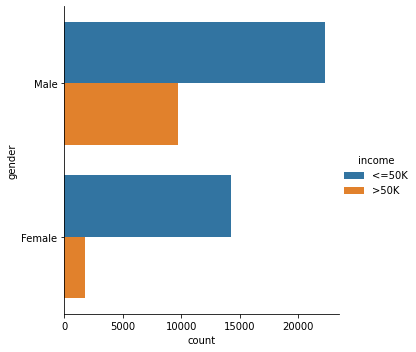

In [112]:
sns.catplot(y="gender", hue="income", kind="count", data=dataFrame, orient="h")
plt.show()